
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [50]:
import pandas as pd # used for data wrangling.
import seaborn as sns # used for visualization.
import matplotlib  # used for visualization.
from matplotlib import pyplot as plt # used for visualization.
import pylab # used for ...
import pingouin as pg # used for various statistic analysis, such as Chi-squared tests and correlation coefficient. (https://pingouin-stats.org/build/html/index.html)

df_mh = pd.read_csv('MillerHadenData.csv')

**Q1a**

In [51]:
# Q1a (code):
# Display first few rows of the dataframe

df_mh.head()

,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


In [52]:
# Check data types and information
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


**Information**
1. The dataset has 25 entries (participants).
2. There is no null values in the dataset. 

**Data types**
1. All columns have a data type of [int64](https://learn.microsoft.com/en-us/dotnet/api/system.int64?view=net-8.0) (a 64-bit integer data type). 

Q1a answer

1. Participant (Participant): The number of each participant is an identifier and the order has no meaning so it is nominal data.

2. Reading Ability (Abil), Intelligence (IQ), Number of minutes spent reading at home per week (Home), Number of minutes spent watching TV per week (TV): They are ratio data since they have a well-defined order, scale, and true zero point.

**Q1b**

In [53]:
# Q1b (code):
# Check for missing values. 
# Check if there is null value in 'Abil' or 'IQ' and get the total number of the null values.
missing_values = df_mh[['Abil', 'IQ']].isnull().sum()

# Check whether there is a data point for each participant on both variables
# if there is null value in either Abil or IQ, there are missing values. 
# If not, there is a data point for each participant on both columns. 
print("Q1b answer")
if missing_values['Abil'] == 0 and missing_values['IQ'] == 0:
    print("There is a data point for each participant on both Reading Ability and IQ.")
else:
    print("There are missing values in either Reading Ability or IQ columns.")

Q1b answer
There is a data point for each participant on both Reading Ability and IQ.


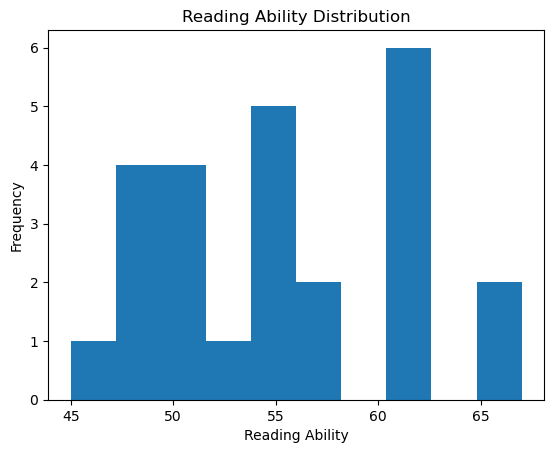

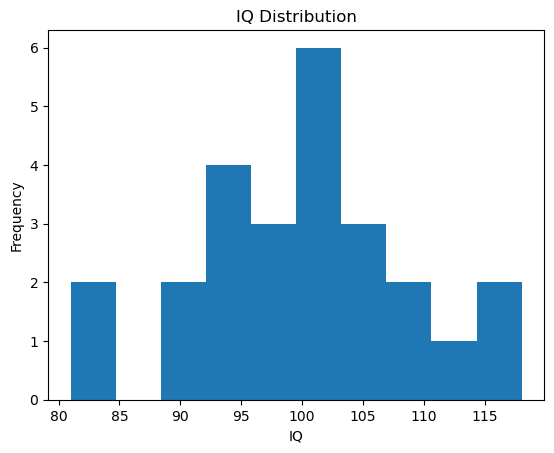

In [54]:
# Q1c (code):
# Check data distribution

# Check the distribution of Reading Ability
plt.hist(df_mh['Abil'])
plt.title('Reading Ability Distribution')
plt.xlabel('Reading Ability')
plt.ylabel('Frequency')
plt.show()

# Check the distribution of IQ
plt.hist(df_mh['IQ'])
plt.title('IQ Distribution')
plt.xlabel('IQ')
plt.ylabel('Frequency')
plt.show()

In [55]:
# Check the normality of the data distribution on Reading Ability
normality_abil = pg.normality(df_mh['Abil'])

# Check the normality of the data distribution on IQ
normality_iq = pg.normality(df_mh['IQ'])

print("Normality of the data distribution on Reading Ability:")
print(normality_abil)

print("Normality of the data distribution on IQ:")
print(normality_iq)

Normality of the data distribution on Reading Ability:
             W      pval  normal
Abil  0.948795  0.235491    True
Normality of the data distribution on IQ:
           W      pval  normal
IQ  0.963604  0.490811    True


[Pingouin.normality](https://pingouin-stats.org/build/html/generated/pingouin.normality.html) assesses whether the data distributes normally. The "W" indicates how well the data fits a normal distribution. p-value is used for check the test results. The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05.

Q1c answer

The data is normally distributed in both Reading Ability and IQ. 

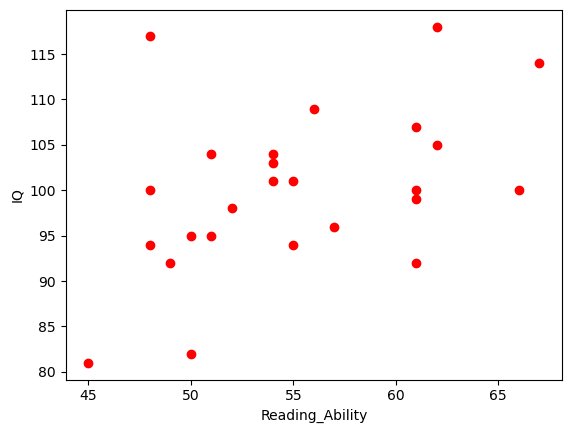

In [56]:
# Q1d (code):
# Scatter plot
# We use the scatter() function - full documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

# extract the values from the 'Abil' and 'IQ' columns.
Reading_Ability = df_mh['Abil']
IQ = df_mh['IQ']

# Create scatter plot
# Use the values of 'Reading_Ability' on the x-axis and 'IQ' on the y-axis. 
# The parameter `c="r"` sets the color of the markers in the plot to red.
plt.scatter(Reading_Ability, IQ, c="r")
# set the labels for the x-axis and y-axis of the scatter plot as "Reading_Ability" and "IQ", respectively.
plt.xlabel("Reading_Ability")
plt.ylabel("IQ")
plt.show()

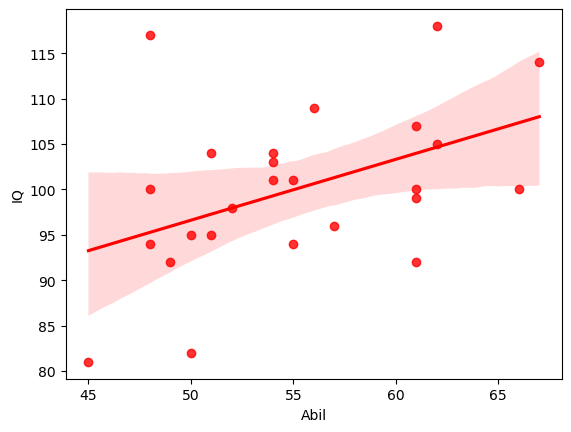

In [57]:
# Q1e (code):
# Correlation line

# To draw the correlation line, we use regplot() from the seaborn package.
# regplot() takes in input a pandas dataframe, specified by the attribute "data". 
# We can specify the variables Abil and IQ in the x and y axes.
plot_corr_sns = sns.regplot(x="Abil", y="IQ", color="r", data=df_mh)
plt.show() 

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

Q2a answer

We can use Pearson correlation coefficient test in this case. The Pearson correlation coefficient is a parametric measure of correlation that assesses the strength and direction of a linear relationship between two variables that are normally distributed. Since the data for Reading Ability and IQ is normally distributed according to the result of Q1c, and there is a linear relationship between them, according to Q1e, the Pearson correlation coefficient test would be more suitable in this case.

In [58]:
# Q2b (code):
Reading_Ability = df_mh['Abil']
IQ = df_mh['IQ']
corr_abil_iq = pg.corr(Reading_Ability, IQ)
corr_abil_iq

,n,r,CI95%,p-val,BF10,power
pearson,25,0.45117,"[0.07, 0.72]",0.023593,2.804,0.640299


- n: The sample size, i.e. how many observations were included in the calculation of the correlation coefficient.

- r: The correlation coefficient.

- CI95: The 95% confidence intervals around the correlation coefficient.

- p-val: the p-value of the test. The hypothesis that the two variables are not correlated will be rejected if the p-value is below 0.05.

- BF10: The Bayes Factor of the test, which also measure the statistical significance of the test. It directly measures the strength of evidence in favor of the initial hypothesis. If this value is very small, it indicates that there is not very strong evidence that the two variables are indeed correlated. 

- power: The achieved power of the test, which is the likelihood that we will detect an effect when there is indeed an effect there to be detected. The higher this value is, the more robust our test is. 

Q2c answer

The Pearson correlation coefficient value of 0.45117 indicates a moderate positive correlation between the Reading Ability and IQ. The direction of the correlation is positive, indicating that an increase in Reading Ability is associated with an increase in IQ. The strength of the correlation is moderate, suggesting a not strong relationship between the two variables.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

Q3a answer

H0: There is no relationship between reading ability and the amount of time spent reading at home per week.

H1：There is a significant relationship between reading ability and the amount of time spent reading at home per week.

In [59]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data wrangling. 
from scipy.stats import chi2_contingency ##used for performing the Chi-square test
import numpy as np ##used for creating contingency matrix

# Define the rounded average for Reading Ability and Home
reading_ability_avg = df_mh['Abil'].mean().round()
home_avg = df_mh['Home'].mean().round()

# Use the `apply` method with a lambda function to compare each value in the 'Abil' and 'Home' 
# (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)
# Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'High' if x > reading_ability_avg else 'Low')

# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Frequent' if x > home_avg else 'Infrequent')

In [60]:
df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Infrequent
2,3,45,81,108,640,Low,Infrequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Infrequent


In [61]:
# Q3c (code):
# Construct Contingency Matrix
datacontingency = pd.crosstab(df_mh["Rank_Abil"], df_mh["Rank_Home"])
data_cm = np.array(datacontingency).reshape(2,-1)
print('The contingency matrix')
print(data_cm)

The contingency matrix
[[ 8  2]
 [ 3 12]]


In [62]:
# Q3d (code):
# Perform the Chi-square test
chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(data_cm)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

6.500270562770561 0.010785807794066234
These are the expected frequencies
[[4.4 5.6]
 [6.6 8.4]]


Q3e answer

The Chi-square value is used to determine if there is a significant association between the categorical variables.
The result indicates that there is a significant difference between the observed and expected frequencies.

The p-value of is smaller than 0.05, suggesting that the null hypothesis is rejected. Therefore, there is a statistically significant relationship between the variables "Rank_Abil" and "Rank_Home." However, given that the results is based on playground data, there might be biases or incorrect data, impacting the results.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [63]:
import pandas as pd # used for data wrangling.
from scipy import stats # used for Shapiro-Wilk test and Levene's test and independent t-tests
import numpy as np #
import matplotlib.pyplot as plt ## used for visualization 
import seaborn as sns # used for visualization 

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [64]:
# Q4a (code):
# Calculate mean and standard deviation for age
age_mean = df_evaluators['age'].mean()
age_std = df_evaluators['age'].std()

print("Mean age:", age_mean)
print("Standard deviation of age:", age_std)

Mean age: 30.852941176470587
Standard deviation of age: 6.238358141327351


In [65]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females

male_count = df_evaluators[df_evaluators['sex'] == 1]['sex'].count()
female_count = df_evaluators[df_evaluators['sex'] == 2]['sex'].count()

print("Number of male evaluators:", male_count)
print("Number of female evaluators:", female_count)

Number of male evaluators: 4
Number of female evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [66]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [67]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
filtered_df = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

In [68]:
filtered_df.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
5,2,competent,5.0
6,2,thoughtful,7.0


In [69]:
# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
# agg() function uses one or more operations over the column 'Rating' after creating the subset dataframe with groupby().

each_mean_rating = filtered_df.groupby("eval_id").agg({'Rating' : ['mean']})
each_mean_rating = each_mean_rating.reset_index()
each_mean_rating.head()

,eval_id,Rating
,,mean
0,1,6.000000
1,2,5.666667
2,3,6.000000
3,4,3.333333
4,5,1.000000


In [70]:
# Add a 'Category' column with the value 'intellect' for these rows.
each_mean_rating['Category'] = 'intellect'

# Rename the columns to the names same as the second dataframe.
each_mean_rating.columns = ['eval_id', 'Rating', 'Category']
each_mean_rating.head()

,eval_id,Rating,Category
0,1,6.000000,intellect
1,2,5.666667,intellect
2,3,6.000000,intellect
3,4,3.333333,intellect
4,5,1.000000,intellect


In [71]:
# Create a DataFrame for 'impression' and 'hire' ratings.
filtered_df2 = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]
filtered_df2.head()

,eval_id,Category,Rating
3,1,impression,7.000000
4,1,hire,6.000000
8,2,impression,4.666667
9,2,hire,4.000000
13,3,impression,8.333333


In [72]:
# Create 'ratings2' DataFrame by concatenating 'each_mean_rating' and 'filtered_df2'.
ratings2 = pd.concat([each_mean_rating, filtered_df2])

In [73]:
ratings2.head()

,eval_id,Rating,Category
0,1,6.000000,intellect
1,2,5.666667,intellect
2,3,6.000000,intellect
3,4,3.333333,intellect
4,5,1.000000,intellect


In [74]:
# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.merge(df_evaluators, on='eval_id')
ratings2

,eval_id,Rating,Category,condition,age,sex
0,1,6.000000,intellect,listened,29.0,2.0
1,1,7.000000,impression,listened,29.0,2.0
2,1,6.000000,hire,listened,29.0,2.0
3,2,5.666667,intellect,listened,27.0,2.0
4,2,4.666667,impression,listened,27.0,2.0
...,...,...,...,...,...,...
112,38,8.333333,impression,listened,31.0,2.0
113,38,5.000000,hire,listened,31.0,2.0
114,39,5.333333,intellect,listened,33.0,2.0
115,39,5.666667,impression,listened,33.0,2.0


In [75]:
# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

In [76]:
# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
2,1,hire,6.000000,listened
1,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
5,2,hire,4.000000,listened
4,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



Q6a (answer in words)

Null hypothesis: There is no significant difference between overall ratings on the scale of intellect between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). 

Alternative hypothesis: There will be a significant difference between overall ratings on the scale of intellect between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

Q6b (answer in words)

Which t-test should we choose, one-tail or two-tail? Explian why.

We should choose a two-tail t-test. This is because we are exploring if there is a significant difference in overall ratings of intellect scale between the evaluators who listened to pitches and those who read pitches, without specifying the direction of the difference. 

Q6c (answer in words)

What are the independent variable and the dependent variable here?
- Independent variable: The conditions of evaluating pitches (listening or reading).
- Dependent variable: Overall ratings on the intellect scale given by the evaluators.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [77]:
##Q7a (code):
# Import necessary library
from scipy.stats import shapiro, levene, ttest_ind # used for Shapiro-Wilk test and Levene's test and independent t-tests 

In [78]:
# Descriptive analysis of the ratings
# Get an overview of the dataframe
ratings2 = ratings2.loc[ratings2['Category']=='intellect']
ratings2.describe()

,eval_id,Rating
count,39.000000,39.000000
mean,20.000000,4.717949
std,11.401754,2.000787
min,1.000000,0.666667
25%,10.500000,3.500000
50%,20.000000,5.000000
75%,29.500000,6.000000
max,39.000000,9.000000


In [79]:
# Create a subet of a dataframe with groupby() bycondition of evaluating and aggregatethe intellect ratings. 
ratings3 = ratings2.groupby("condition").agg({'Rating':['mean']})
print(ratings3)

             Rating
               mean
condition          
listened   5.634921
read       3.648148


In [80]:
# Create a sub-dataframe for the "listened" species using .loc[]
rating_loc = ratings2.loc[ratings2["condition"] == "listened"]
print(rating_loc)

     eval_id   Category    Rating condition
0          1  intellect  6.000000  listened
3          2  intellect  5.666667  listened
6          3  intellect  6.000000  listened
18         7  intellect  3.666667  listened
24         9  intellect  5.000000  listened
33        12  intellect  9.000000  listened
36        13  intellect  6.000000  listened
45        16  intellect  9.000000  listened
48        17  intellect  2.333333  listened
51        18  intellect  4.666667  listened
69        24  intellect  5.666667  listened
72        25  intellect  7.666667  listened
75        26  intellect  6.666667  listened
81        28  intellect  4.666667  listened
84        29  intellect  5.666667  listened
87        30  intellect  3.333333  listened
96        33  intellect  6.000000  listened
99        34  intellect  5.000000  listened
105       36  intellect  6.000000  listened
111       38  intellect  5.000000  listened
114       39  intellect  5.333333  listened


In [81]:
#To obtain a sub-dataframe for 'listened' from groupby() by using the .get_group()
sub_df = ratings2.groupby("condition")
listened = sub_df.get_group("listened")

In [82]:
#To obtain a sub-dataframe for 'read' from groupby() by using the .get_group()
sub_df = ratings2.groupby("condition")
read = sub_df.get_group("read")

<Axes: >

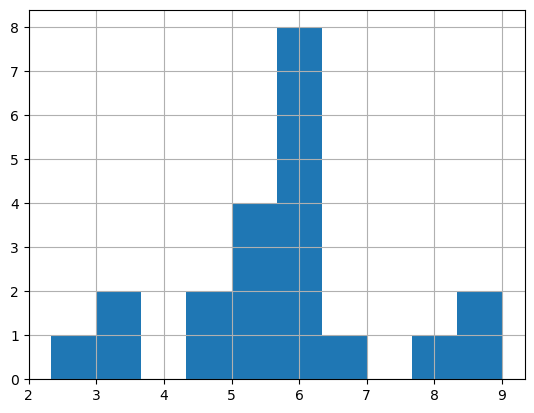

In [83]:
# For each condition, plot the sepal width using .hist()
listened['Rating'].hist()

<Axes: >

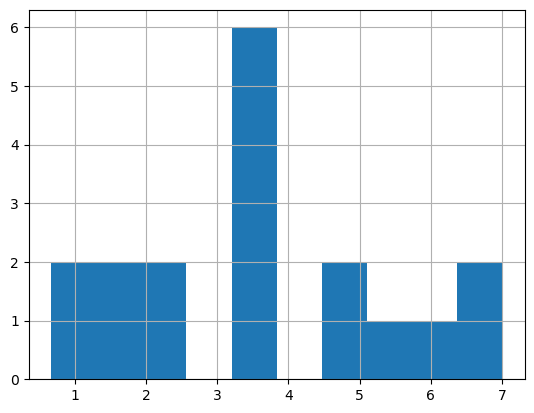

In [84]:
read['Rating'].hist()

In [85]:
# Test for normal distribution (Shapiro-Wilk test)
# Use the Shapiro-Wilk test in the statistical package of scipy with the function.
# It returns the Shapiro-Wilk score and the p-value

score_shapiro_versicolor, p_val_shapiro_versicolor = stats.shapiro(listened['Rating'])
print(score_shapiro_versicolor, p_val_shapiro_versicolor)

0.9350408315658569 0.17365092039108276


In [86]:
score_shapiro_versicolor, p_val_shapiro_versicolor = stats.shapiro(read['Rating'])
print(score_shapiro_versicolor, p_val_shapiro_versicolor)

0.9512398838996887 0.4447984993457794


The data are normally distributed. p-values for each variable is largr than 0.05

In [87]:
# Test for homogeneity of variances (Levene's test)
# We use the Levene's test in the statistical package of scipy:
# It returns the Levene score and the p-value

score, p_val = stats.levene(listened['Rating'], read['Rating'])
print(score, p_val)
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

0.8980185752566812 0.34946205893248505
Levene's test is not significant - proceed


In [88]:
# Independent t-test
# We can use scipy stats.ttest_ind(). It returns the t-test score and the p-value
score, p_val = stats.ttest_ind(listened['Rating'], read['Rating'])
print(score, p_val)
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")

3.5259329220482414 0.0011444414996286821
Difference is statistically significant - reject H0, confirm H1


Q7b (answer in words)

1. Descriptive Statistics: Descriptive statistics provide a summary of the data, such as mean. These statistics help us understand the central tendency of the data. In the given results, the mean intellect rating of listened is 5.634921, which is higher than the mean rating of read, which is 3.648148. Thus, it might suggest that there is a difference on evaluating between the two methods (listened and read). 

2. Shapiro-Wilk Test: The Shapiro-Wilk test is used to assess the normality of the data distribution. The test provides a p-value. We can reject the hypothesis of normality, if the p-value is less than or equal to 0.05. For both listened and read datasets, the p-values are greater than 0.05. Thus, we can assume that the intellect ratings in both datasets are normally distributed.

3. Levene's Test: Levene's test is used to assess if the variances of the intellect ratings between the two groups (listened and read) are equal. The test provides a p-value. If the p-value is greater than 0.05, we cannot reject the null hypothesis of equal variances. In the given results, the p-value is not significant. Thus, there is perhaps no significant difference in variances between the 'listened' and 'read' groups. As the result is not significant, we apply the independent t-test. 

4. Independent t-Test: t-test is used when the statistic follows a normal distribution, but the variance is unknown. The independent t-test is used if the variances between the two groups are equal. The test provides a test statistic and a p-value. If the p-value is less than 0.05, we have can reject the null hypothesis. In the given results, the p-value is less than 0.05. Thus, we can conclude that there is a significant difference in the mean intellect ratings between the listened and read groups.